In [12]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./dataset/weatherAUS.csv')

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
sydney_2016 = df[(df['Date'].dt.year == 2016) & (df['Location'] == 'Sydney')]

In [11]:
sydney_2016

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
32978,2016-01-01,Sydney,17.9,25.6,0.0,11.0,12.3,E,35.0,SSW,...,57.0,52.0,1016.4,1013.7,6.0,4.0,22.9,24.2,No,No
32979,2016-01-02,Sydney,18.0,25.4,0.0,6.8,3.3,ESE,28.0,NaN,...,60.0,51.0,1013.4,1012.3,7.0,7.0,22.3,23.5,No,No
32980,2016-01-03,Sydney,20.2,24.6,0.0,8.0,0.0,SE,44.0,SSE,...,63.0,84.0,1015.2,1014.7,8.0,8.0,22.2,19.9,No,Yes
32981,2016-01-04,Sydney,18.6,23.6,15.0,6.4,0.7,ESE,46.0,ESE,...,86.0,89.0,1016.8,1016.3,8.0,8.0,18.8,19.1,Yes,Yes
32982,2016-01-05,Sydney,17.8,20.3,34.2,0.0,0.0,ESE,54.0,SE,...,87.0,87.0,1016.5,1014.6,8.0,8.0,19.1,19.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,2016-12-27,Sydney,21.8,29.6,0.0,11.2,6.0,NE,43.0,S,...,66.0,60.0,1014.5,1013.3,7.0,7.0,25.7,27.5,No,No
33340,2016-12-28,Sydney,21.1,28.9,0.0,7.8,9.4,NNE,61.0,E,...,63.0,48.0,1013.0,1009.7,6.0,6.0,24.9,27.5,No,No
33341,2016-12-29,Sydney,22.6,36.6,0.0,10.4,4.8,E,28.0,W,...,49.0,30.0,1007.2,1004.4,7.0,6.0,28.1,31.8,No,No
33342,2016-12-30,Sydney,23.9,33.3,0.0,9.2,0.5,NNE,30.0,W,...,58.0,34.0,1003.6,1001.7,8.0,7.0,27.3,32.1,No,No


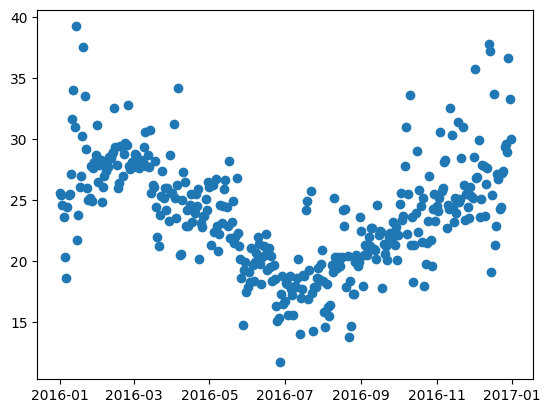

In [13]:
plt.scatter(sydney_2016['Date'], sydney_2016['MaxTemp'])

In [21]:
def weighted_average(column ,beta):
    v = [0]
    n = column.shape[0]
    for i in range(n):
        v.append(beta*v[-1] + (1-beta)*column.iloc[i])
    return v[1:]

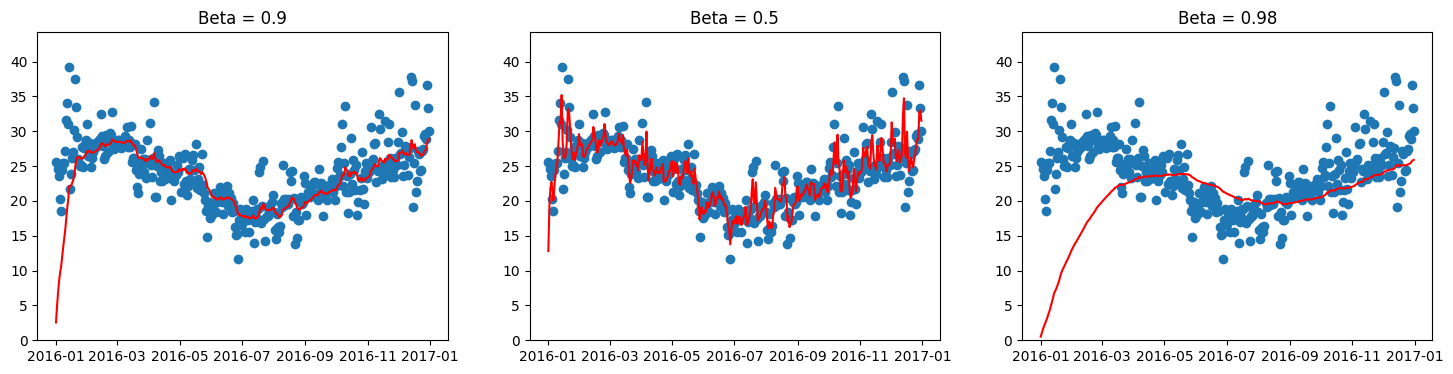

In [22]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
beta = [0.9,0.5,0.98]
for i in range(3):
    ax[i].scatter(sydney_2016["Date"],sydney_2016["MaxTemp"])
    a1 = weighted_average(sydney_2016["MaxTemp"],beta[i])
    ax[i].plot(sydney_2016["Date"],a1,c="r")
    ax[i].set_title("Beta = {}".format(beta[i]))
    ax[i].set_ylim(0,sydney_2016["MaxTemp"].max()+5)